### Visualisations for article for Kybernetika
Starting with all required imports and setting display to greyscale as Kybernetika is not printed in color.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('grayscale')

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

## Overview of all reference biases

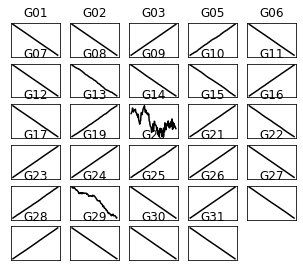

In [2]:
fig = plt.figure(figsize=cm2inch(13, 13))
fig.tight_layout(pad=0.8, h_pad=2)
fig.patch.set_facecolor('white')
skip = 0
ax = None 

for subplot, satellite in enumerate(range(1,31)):
    loaded = False
    satellite += skip
    reference = None
    while not loaded and satellite < 32:
        try:
            reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
            loaded = True
        except Exception:
            skip += 1
            satellite += 1
    
    if reference is not None:
        epochs = reference['Epoch'].to_numpy()[1:]
        epochs = np.arange(1, epochs.size*15, 15)
        bias_ref = reference['Clock_bias'].to_numpy()[1:]

        ax = fig.add_subplot(7, 5, subplot+1)
        ax.title.set_text(f'G{satellite:02d}')
        ax.set_yscale('linear')
        ax.plot(epochs, bias_ref)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.show()

### More precise visualisation of selected biases
G01 and G08 are examples of typical Rubidium satellites, G24 is Cesium based clock ensemble and G14 is only satellite in whole constalation that lacks distinct constant clock drift. I do not know 

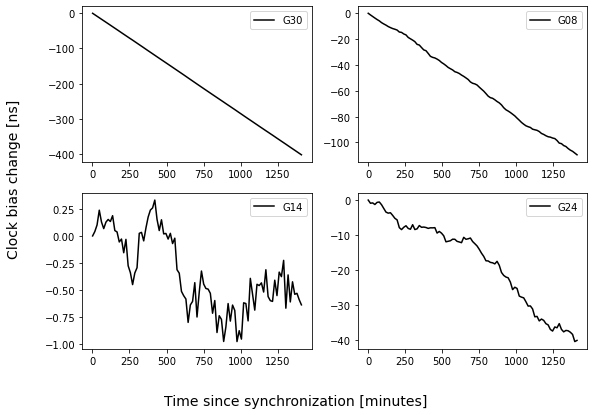

In [3]:
fig = plt.figure(figsize=cm2inch(23, 16))
fig.tight_layout(pad=2, h_pad=6)
fig.patch.set_facecolor('white')
skip = 0
ax = None 

sats = [30, 8, 14, 24]

for subplot, satellite in enumerate(sats):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';') 
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    bias_ref -= bias_ref[0]
    #bias_ref = np.abs(bias_ref)
    
    ax = fig.add_subplot(2, 2, subplot+1)
    #ax.title.set_text(f'G{satellite:02d}')
    ax.set_yscale('linear')
    ax.ticklabel_format(style='sci', useOffset=False)
    ax.plot(epochs, bias_ref, label=f'G{satellite:02d}')
    ax.legend()
fig.text(0.25, 0.01, 'Time since synchronization [minutes]', va='center', fontsize=14)
fig.text(0.01, 0.5, 'Clock bias change [ns]', va='center', rotation='vertical', fontsize=14)

plt.show()

### Same satellites but differentiated

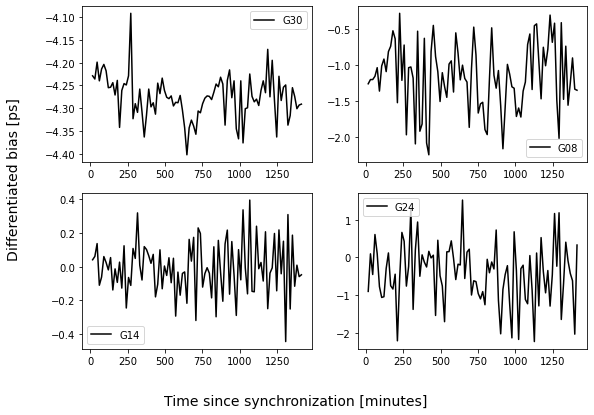

In [4]:
fig = plt.figure(figsize=cm2inch(23, 16))
fig.tight_layout(pad=2, h_pad=2)
fig.patch.set_facecolor('white')
skip = 0
ax = None 

sats = [30, 8, 14, 24]

for subplot, satellite in enumerate(sats):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';') 
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    
    epochs = epochs[1:]
    bias_ref = np.diff(bias_ref)
    
    ax = fig.add_subplot(2, 2, subplot+1)
    ax.set_yscale('linear')
    ax.ticklabel_format(useOffset=False)
    ax.plot(epochs, bias_ref, label=f'G{satellite:02d}')
    ax.legend()

fig.text(0.25, 0.01, 'Time since synchronization [minutes]', va='center', fontsize=14)
fig.text(0.01, 0.5, 'Differentiated bias [ps]', va='center', rotation='vertical', fontsize=14)
plt.show()

### Comparition of diferentiated and unnormalized

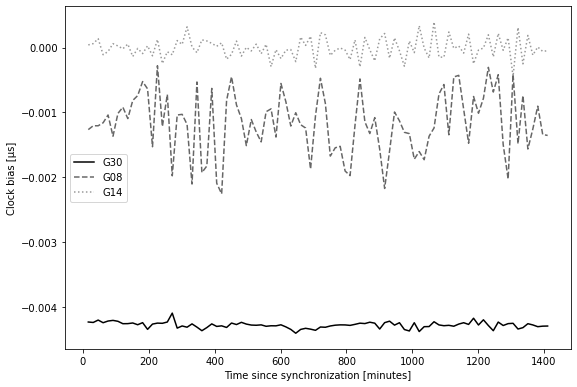

In [5]:
fig = plt.figure(figsize=cm2inch(23, 16))
fig.tight_layout(pad=2, h_pad=2)
fig.patch.set_facecolor('white')
skip = 0
ax = fig.gca()
ax.ticklabel_format(useOffset=False) 

sats = [30, 8, 14]
l_types = ['solid', 'dashed', 'dotted']

for satellite, l_type in zip(sats, l_types):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
    
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    
    epochs = epochs[1:]
    bias_ref = np.diff(bias_ref)
    
    ax.plot(epochs, bias_ref/1000, label=f'G{satellite:02d}', ls=l_type)

ax.set_xlabel('Time since synchronization [minutes]')
ax.set_ylabel('Clock bias [μs]')
plt.legend()
plt.show()

### Same data after normalization

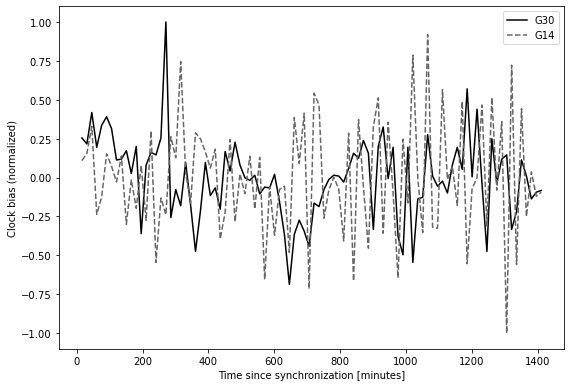

In [6]:
fig = plt.figure(figsize=cm2inch(23, 16))
fig.tight_layout(pad=2, h_pad=2)
fig.patch.set_facecolor('white')
skip = 0
ax = fig.gca()
ax.ticklabel_format(useOffset=False) 

sats = [30, 14]
l_types = ['solid', 'dashed', 'dotted']

for satellite, l_type in zip(sats, l_types):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
    
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    
    epochs = epochs[1:]
    bias_ref = np.diff(bias_ref)
    bias_ref -= np.mean(bias_ref)
    bias_ref /= max(np.max(bias_ref), abs(np.min(bias_ref)))
    
    ax.plot(epochs, bias_ref, label=f'G{satellite:02d}', ls=l_type)

ax.set_xlabel('Time since synchronization [minutes]')
ax.set_ylabel('Clock bias (normalized)')
plt.legend()
plt.show()

### Results of prediction for those satellites

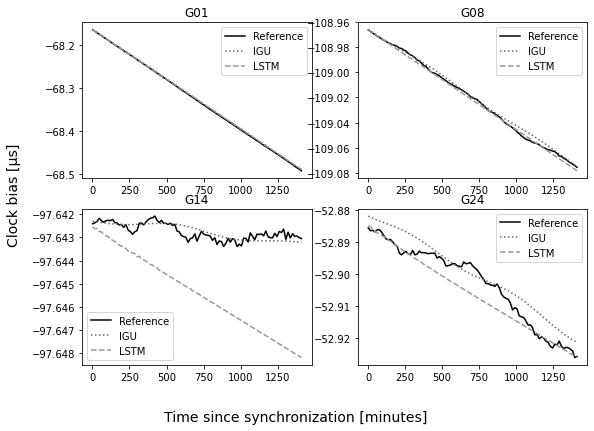

In [7]:
fig = plt.figure(figsize=cm2inch(23, 16))
fig.tight_layout(pad=3, h_pad=2)
fig.patch.set_facecolor('white')
skip = 0
ax = None 

sats = [1, 8, 14, 24]

for subplot, satellite in enumerate(sats):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
    igu = pd.read_csv(f'csv/igu_predicted/G{satellite:02d}.csv', sep=';')
    lstm = pd.read_csv(f'csv/lstm_predicted/G{satellite:02d}_no.csv', sep=';')
    
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    bias_igu = igu['Clock_bias'].to_numpy()[1:]
    bias_lstm = lstm['Clock_bias'].to_numpy()[1:]
    
    ax = fig.add_subplot(2, 2, subplot+1)
    ax.title.set_text(f'G{satellite:02d}')
    ax.set_yscale('linear')
    ax.ticklabel_format(useOffset=False)
    ax.plot(epochs, bias_ref/1000, label='Reference', ls='solid')
    ax.plot(epochs, bias_igu/1000, label='IGU', ls='dotted')
    ax.plot(epochs, bias_lstm/1000, label='LSTM', ls='dashed')
    ax.legend()
fig.text(0.25, 0.01, 'Time since synchronization [minutes]', va='center', fontsize=14)
fig.text(0.01, 0.5, 'Clock bias [μs]', va='center', rotation='vertical', fontsize=14)
plt.show()

### Visualisation of squared errors for predictors, overview for all satellites

[]

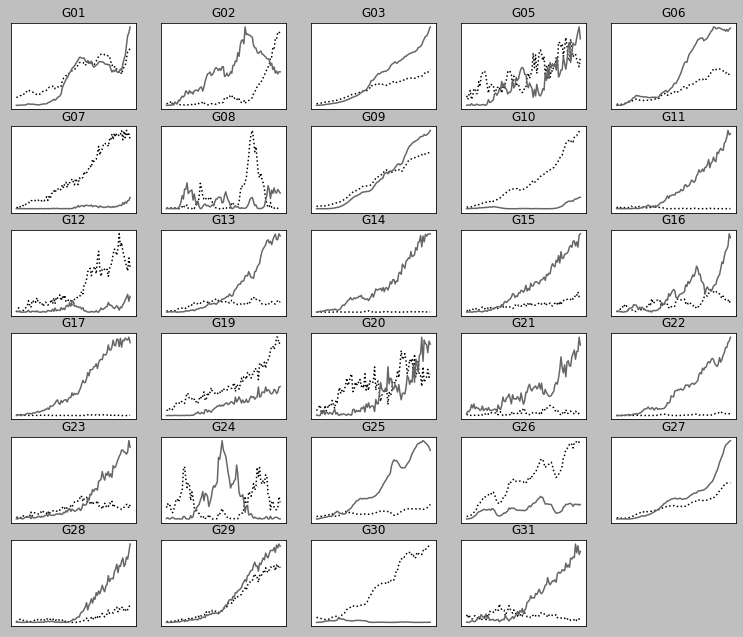

In [8]:
fig = plt.figure(figsize=(13, 13))
fig.tight_layout(pad=0.8)
skip = 0
ax = None 
for subplot, satellite in enumerate(range(1,31)):
    loaded = False
    satellite += skip
    reference = None
    igu = None
    lstm = None
    while not loaded and satellite < 32:
        try:
            reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
            igu = pd.read_csv(f'csv/igu_predicted/G{satellite:02d}.csv', sep=';')
            lstm = pd.read_csv(f'csv/lstm_predicted/G{satellite:02d}_no.csv', sep=';')
            loaded = True
        except Exception:
            skip += 1
            satellite += 1
    
    if reference is not None:
        epochs = reference['Epoch'].to_numpy()[1:]
        epochs = np.arange(1, epochs.size*15, 15)
        bias_ref = reference['Clock_bias'].to_numpy()[1:]
        bias_igu = igu['Clock_bias'].to_numpy()[1:]
        bias_lstm = lstm['Clock_bias'].to_numpy()[1:]
        
        ax = fig.add_subplot(7, 5, subplot+1)
        ax.title.set_text(f'G{satellite:02d}')
        ax.set_yscale('linear')
        ax.plot(epochs, (bias_igu-bias_ref)**2, label='IGU', ls='dotted')
        ax.plot(epochs, (bias_lstm-bias_ref)**2, label='LSTM', ls='solid')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        #ax.legend()
plt.plot()

### And now sqare errors for selected satellites

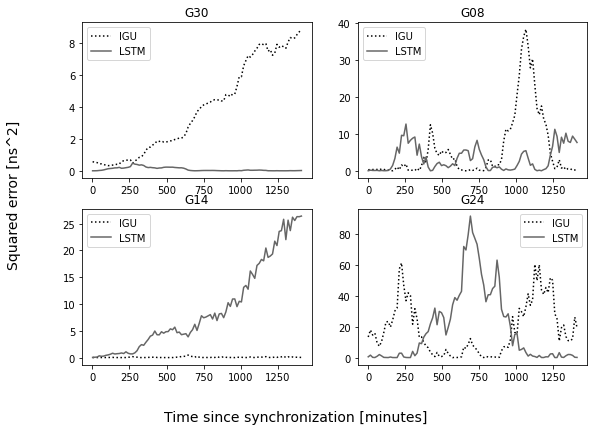

In [9]:
fig = plt.figure(figsize=cm2inch(23, 16))
fig.tight_layout(pad=2, h_pad=2)
fig.patch.set_facecolor('white')
skip = 0
ax = None 

sats = [30, 8, 14, 24]

for subplot, satellite in enumerate(sats):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
    igu = pd.read_csv(f'csv/igu_predicted/G{satellite:02d}.csv', sep=';')
    lstm = pd.read_csv(f'csv/lstm_predicted/G{satellite:02d}_no.csv', sep=';')
    
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    bias_igu = igu['Clock_bias'].to_numpy()[1:]
    bias_lstm = lstm['Clock_bias'].to_numpy()[1:]
    
    ax = fig.add_subplot(2, 2, subplot+1)
    ax.title.set_text(f'G{satellite:02d}')
    ax.set_yscale('linear')
    ax.ticklabel_format(useOffset=False)
    ax.plot(epochs, (bias_igu-bias_ref)**2, label='IGU', ls='dotted')
    ax.plot(epochs, (bias_lstm-bias_ref)**2, label='LSTM', ls='solid')
    ax.legend()
fig.text(0.25, 0.01, 'Time since synchronization [minutes]', va='center', fontsize=14)
fig.text(0.01, 0.5, 'Squared error [ns^2]', va='center', rotation='vertical', fontsize=14)
plt.show()

### Finding breakepoint at which LSTM is worse then IGU
There is group of satellites for which we are better at first and then become worse. Here we try to find for which sattelites this brakeoff is at acceptable level

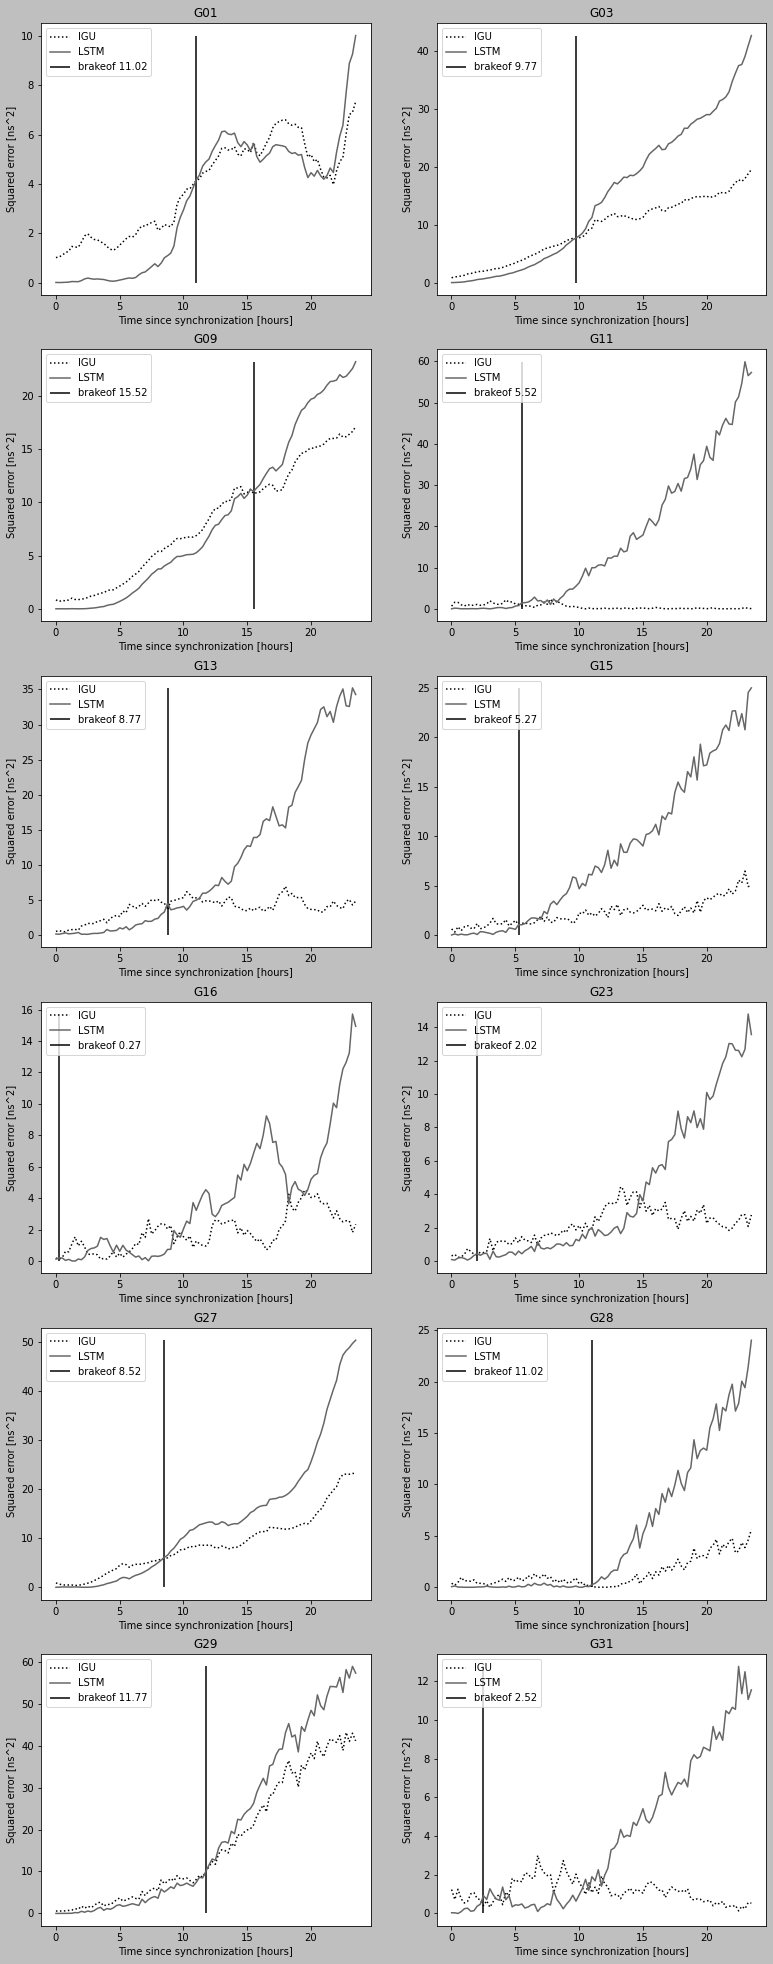

In [10]:
fig = plt.figure(figsize=(13, 35))
fig.tight_layout(pad=5, h_pad=5)
skip = 0
ax = None 

sats = [1, 3, 9, 11, 13, 15, 16, 23, 27, 28, 29, 31]

for subplot, satellite in enumerate(sats):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
    igu = pd.read_csv(f'csv/igu_predicted/G{satellite:02d}.csv', sep=';')
    lstm = pd.read_csv(f'csv/lstm_predicted/G{satellite:02d}_no.csv', sep=';')
    
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)/60
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    bias_igu = igu['Clock_bias'].to_numpy()[1:]
    bias_lstm = lstm['Clock_bias'].to_numpy()[1:]
    
    err_igu = (bias_igu-bias_ref)**2
    err_lstm = (bias_lstm-bias_ref)**2
    err_max = max(err_igu.max(), err_lstm.max())
    brake_idx = epochs[np.argmax(err_lstm-err_igu>0)]
    
    ax = fig.add_subplot(6, 2, subplot+1)
    ax.title.set_text(f'G{satellite:02d}')
    ax.set_xlabel('Time since synchronization [hours]')
    ax.set_ylabel('Squared error [ns^2]')
    ax.set_yscale('linear')
    ax.ticklabel_format(useOffset=False)
    ax.plot(epochs, err_igu, label='IGU', ls='dotted')
    ax.plot(epochs, err_lstm , label='LSTM', ls='solid')
    plt.vlines(x = brake_idx, ymin=0, ymax=err_max, label = f'brakeof {brake_idx:.2f}')
    ax.legend()
plt.show()

### Only selected breakpoints that will be shown in article

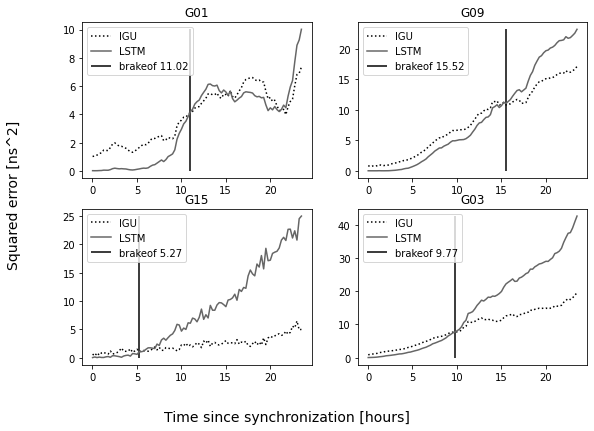

In [11]:
fig = plt.figure(figsize=cm2inch(23, 16))
fig.tight_layout(pad=2, h_pad=2)
fig.patch.set_facecolor('white')
skip = 0
ax = None 

sats = [1, 9, 15, 3]

for subplot, satellite in enumerate(sats):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
    igu = pd.read_csv(f'csv/igu_predicted/G{satellite:02d}.csv', sep=';')
    lstm = pd.read_csv(f'csv/lstm_predicted/G{satellite:02d}_no.csv', sep=';')
    
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)/60
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    bias_igu = igu['Clock_bias'].to_numpy()[1:]
    bias_lstm = lstm['Clock_bias'].to_numpy()[1:]
    
    err_igu = (bias_igu-bias_ref)**2
    err_lstm = (bias_lstm-bias_ref)**2
    err_max = max(err_igu.max(), err_lstm.max())
    brake_idx = epochs[np.argmax(err_lstm-err_igu>0)]
    
    ax = fig.add_subplot(2, 2, subplot+1)
    ax.title.set_text(f'G{satellite:02d}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yscale('linear')
    ax.ticklabel_format(useOffset=False)
    ax.plot(epochs, err_igu, label='IGU', ls='dotted')
    ax.plot(epochs, err_lstm , label='LSTM', ls='solid')
    plt.vlines(x = brake_idx, ymin=0, ymax=err_max, label = f'brakeof {brake_idx:.2f}')
    ax.legend()

fig.text(0.25, 0.01, 'Time since synchronization [hours]', va='center', fontsize=14)
fig.text(0.01, 0.5, 'Squared error [ns^2]', va='center', rotation='vertical', fontsize=14)
plt.show()

In [12]:
import seaborn as sns

In [13]:

sats = range(1,31)
columns = {}

for prn in sats:
    try:
        reference = pd.read_csv(f'csv/reference/G{prn:02d}.csv', sep=';')
        igu = pd.read_csv(f'csv/igu_predicted/G{prn:02d}.csv', sep=';')
        lstm = pd.read_csv(f'csv/lstm_predicted/G{prn:02d}_no.csv', sep=';')
        columns[f'{prn}_ref'] = reference['Clock_bias'].to_numpy()[1:]
        columns[f'{prn}_igu'] = igu['Clock_bias'].to_numpy()[1:]
        columns[f'{prn}_lstm'] = lstm['Clock_bias'].to_numpy()[1:]
    except FileNotFoundError:
        print(f'No predictions for satellite {prn}, skipping.')

print(len(np.arange(1,len(columns['1_ref']))))
columns['measurement'] = np.arange(1,len(columns['1_ref'])+1)

all_predictions = pd.DataFrame(columns)

No predictions for satellite 4, skipping.
No predictions for satellite 18, skipping.
94


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 85 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1_ref        95 non-null     float64
 1   1_igu        95 non-null     float64
 2   1_lstm       95 non-null     float64
 3   2_ref        95 non-null     float64
 4   2_igu        95 non-null     float64
 5   2_lstm       95 non-null     float64
 6   3_ref        95 non-null     float64
 7   3_igu        95 non-null     float64
 8   3_lstm       95 non-null     float64
 9   5_ref        95 non-null     float64
 10  5_igu        95 non-null     float64
 11  5_lstm       95 non-null     float64
 12  6_ref        95 non-null     float64
 13  6_igu        95 non-null     float64
 14  6_lstm       95 non-null     float64
 15  7_ref        95 non-null     float64
 16  7_igu        95 non-null     float64
 17  7_lstm       95 non-null     float64
 18  8_ref        95 non-null     float64
 19  8_igu     

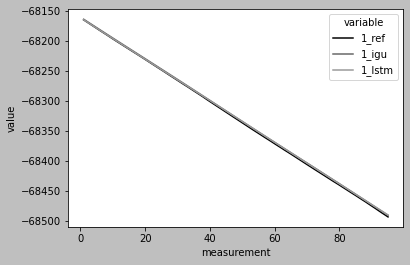

In [14]:
all_predictions.info()
melted = pd.melt(all_predictions[['1_ref','1_igu','1_lstm','measurement']], ['measurement'])
melted.info()
melted.head()
sns.lineplot(x='measurement', y='value', hue='variable', data=melted)
plt.show()

In [15]:
melted.tail()

,measurement,variable,value
280,91,1_lstm,-68475.567892
281,92,1_lstm,-68479.024504
282,93,1_lstm,-68482.482007
283,94,1_lstm,-68485.940232
284,95,1_lstm,-68489.399227


In [32]:
fig = plt.figure(figsize=cm2inch(13, 13))
fig.tight_layout(pad=0.8, h_pad=2)
fig.patch.set_facecolor('white')
skip = 0
ax = None

BRAKEOFF = 56

errors_lstm = {}
errors_igu = {}
err_diff = {}
rel_errors_igu = {}
rel_errors_lstm = {}
rel_err_diff = {}

errors_lstm_diff = {}
errors_igu_diff = {}
err_diff_diff = {}

for satellite in range(1,31):
    loaded = False
    satellite += skip
    reference = None
    igu = None
    lstm = None
    
    while not loaded and satellite < 32:
        try:
            reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
            igu = pd.read_csv(f'csv/igu_predicted/G{satellite:02d}.csv', sep=';')
            lstm = pd.read_csv(f'csv/lstm_predicted/G{satellite:02d}_no.csv', sep=';')
            loaded = True
        except Exception as e:
            print(f'Skipping satellite {satellite}')
            print(f'Reason -> {e}')
            skip += 1
            satellite += 1
    
    if loaded:
        
        sat = f'{satellite:02d}'
        
        bias_ref = reference['Clock_bias'].to_numpy()[1:BRAKEOFF]
        bias_igu = igu['Clock_bias'].to_numpy()[1:BRAKEOFF]
        bias_lstm = lstm['Clock_bias'].to_numpy()[1:BRAKEOFF]

        bias_ref_diff = np.diff(bias_ref)
        bias_igu_diff = np.diff(bias_igu)
        bias_lstm_diff = np.diff(bias_lstm)
    
        errors_igu[sat] = np.sqrt(np.average((bias_igu-bias_ref)**2))
        errors_lstm[sat] = np.sqrt(np.average((bias_lstm-bias_ref)**2))
        err_diff[sat] = np.average(np.sqrt((bias_igu-bias_ref)**2)) - np.sqrt(np.average((bias_lstm-bias_ref)**2))
        
        errors_igu_diff[satellite] = np.average((bias_igu_diff-bias_ref_diff)**2)
        errors_lstm_diff[satellite] = np.average((bias_lstm_diff-bias_ref_diff)**2)
        err_diff_diff[satellite] =  errors_igu_diff[satellite] - errors_lstm_diff[satellite]
        
        rel_errors_igu[satellite] = np.average(((bias_igu-bias_ref)/bias_ref)**2)
        rel_errors_lstm[satellite] = np.average(((bias_lstm-bias_ref)/bias_ref)**2)
        rel_err_diff[satellite] = rel_errors_igu[satellite] - rel_errors_lstm[satellite]

Skipping satellite 4
Reason -> [Errno 2] No such file or directory: 'csv/reference/G04.csv'
Skipping satellite 18
Reason -> [Errno 2] No such file or directory: 'csv/reference/G18.csv'


<Figure size 368.504x368.504 with 0 Axes>

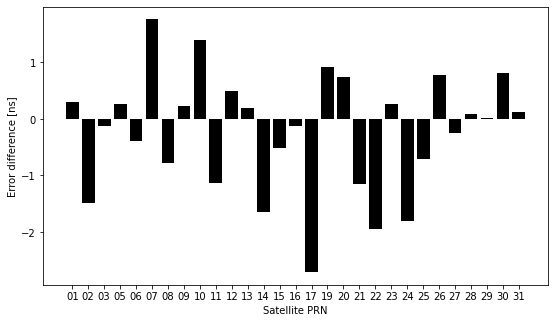

['01', '02', '03', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']


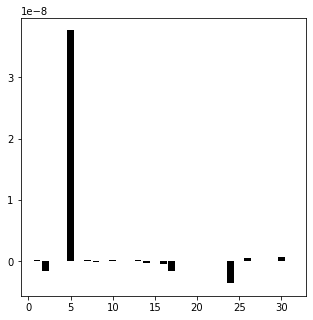

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 566.929x368.504 with 0 Axes>

In [33]:
fig = plt.figure(figsize=cm2inch(23, 13))
fig.tight_layout(pad=0.8, h_pad=2)
fig.patch.set_facecolor('white')
ticks = list(range(1,31))
ticks.remove(4)
#plt.xticks(ticks)
plt.xlabel('Satellite PRN')
plt.ylabel('Error difference [ns]')
plt.bar(list(err_diff.keys()), list(err_diff.values()))
plt.show()
print(f'{list(err_diff.keys())}')

fig = plt.figure(figsize=cm2inch(13, 13))
fig.tight_layout(pad=0.8, h_pad=2)
fig.patch.set_facecolor('white')
plt.bar(list(rel_err_diff.keys()), list(rel_err_diff.values()))
plt.show()

fig = plt.figure(figsize=cm2inch(20, 13))
fig.tight_layout(pad=0.8, h_pad=2)
fig.patch.set_facecolor('white')
plt.bar(x=list(err_diff_diff.keys()), y=list(err_diff_diff.values()))
plt.show()

In [ ]:
for sat in rel_errors_igu.keys():
    print(f'For satellite {sat} IGU error is {rel_errors_igu[sat]} and LSTM error is {rel_errors_lstm[sat]}')